<a href="https://colab.research.google.com/github/MattColb/CS167_Notes/blob/main/Day20_Neural_Networks_Part_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day20
## Neural Networks Part III

#### CS167: Machine Learning, Spring 2023

Tuesday, April 11th, 2023

📆 [Course Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vSvFV5Mz0_YZE1d5r3gQ8IMktE4cBAsJIlP30cl2GhEpSO0J-YWV62QokSDz-OcOCsEmxMuKpY0kVlR/pubhtml?gid=0&single=true) | 🙋[PollEverywhere](https://pollev.com/meredithmoore011) | 📜 [Syllabus](https://analytics.drake.edu/~moore/cs167_s23_syllabus.html) | 📬 [CodePost Login](https://codepost.io/login)

# Admin Stuff

Grading--I owe you grades for:
- Project #1
- Quiz #2
- Notebook #5


You should be working on:
- [Notebook #6](https://classroom.github.com/a/pUdpmxBH) is released today, due April 17th by 11:59pm 

# Announcement

__Thursday 4/13__: We'll have guest speakers from Berkshire Hathaway 

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/berkshire_hathaway_energy.jpeg?raw=1" width=250/>
</div>

## Load your data:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas
path = '/content/drive/MyDrive/CS167/Datasets/irisData.csv'
data = pandas.read_csv(path)

## Quick Review:

# Neural Network Summary

Neural Networks are effective in __finding non-linear patterns__ in the training data.
- can be applied to __regression__ or __classification__.
- __backpropagation__ tunes the weights over a neural network using __gradient descent__ to iteratively reduce the error in the network. 
- __Overfitting__ the training data is common and is important to avoid.
- The following parameters shoudl be tuned when using neural networks:
    - number of epochs
    - structure of the network (depth, width)
    - activation function
    - eta (learning rate)


# Training a Neural Network to Predict Taxi Fares:

Download `taxi-fares.csv` from Blackboard and put it in your Google Drive. This data is from the New York City Taxi and LImousine Commision and includes data about taxi fares.

Let's start by loading in our dataset and doing some pre-processing.

In [3]:
from math import sqrt
import pandas as pd

#load dataset
path = '/content/drive/MyDrive/CS167/Datasets/taxi-fares.csv'
df = pd.read_csv(path, parse_dates=['pickup_datetime'])

# data prep
df = df[df['passenger_count'] == 1]
df = df.drop(['key', 'passenger_count'], axis=1)
 
for i, row in df.iterrows():
    dt = row['pickup_datetime']
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    x = (row['dropoff_longitude'] - row['pickup_longitude']) * 54.6
    y = (row['dropoff_latitude'] - row['pickup_latitude']) * 69.0
    distance = sqrt(x**2 + y**2)
    df.at[i, 'distance'] = distance
 
df.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
         'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)
 
df = df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['fare_amount'] > 0.0) & (df['fare_amount'] < 50.0)]
df.head()

,fare_amount,day_of_week,pickup_time,distance
2,6.1,0.0,15.0,1.038136
4,10.5,5.0,10.0,2.924341
5,15.3,4.0,20.0,4.862893
8,7.7,5.0,1.0,2.603493
9,8.9,3.0,16.0,1.365739


## 🙋 PollEverywhere 

# Build Your Model:

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=3))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2048      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 265,217
Trainable params: 265,217
Non-trainable params: 0
_________________________________________________________________


- What is the _depth_ of this model?
- How many attributes are input to the model?
- What is the _width_ of the hidden layers of this model?
- What type of Gradient Descent is being used to train this model?
- What metrics are we keeping track of?

# Now, let's train our model:

In [5]:
x = df.drop('fare_amount', axis=1)
y = df['fare_amount']

hist = model.fit(x, y, validation_split=0.2, epochs=50, batch_size=100)

Epoch 1/50
187/187 [==============================] - 4s 13ms/step - loss: 2.8781 - mae: 2.8781 - val_loss: 2.4119 - val_mae: 2.4119
Epoch 2/50
187/187 [==============================] - 1s 8ms/step - loss: 2.3892 - mae: 2.3892 - val_loss: 2.3625 - val_mae: 2.3625
Epoch 3/50
187/187 [==============================] - 1s 8ms/step - loss: 2.3863 - mae: 2.3863 - val_loss: 2.3616 - val_mae: 2.3616
Epoch 4/50
187/187 [==============================] - 1s 8ms/step - loss: 2.3603 - mae: 2.3603 - val_loss: 2.3589 - val_mae: 2.3589
Epoch 5/50
187/187 [==============================] - 1s 8ms/step - loss: 2.3814 - mae: 2.3814 - val_loss: 2.5145 - val_mae: 2.5145
Epoch 6/50
187/187 [==============================] - 1s 8ms/step - loss: 2.3770 - mae: 2.3770 - val_loss: 2.3387 - val_mae: 2.3387
Epoch 7/50
187/187 [==============================] - 1s 8ms/step - loss: 2.3570 - mae: 2.3570 - val_loss: 2.3489 - val_mae: 2.3489
Epoch 8/50
187/187 [==============================] - 2s 9ms/step - loss: 2

# And take a look at the results:

[]

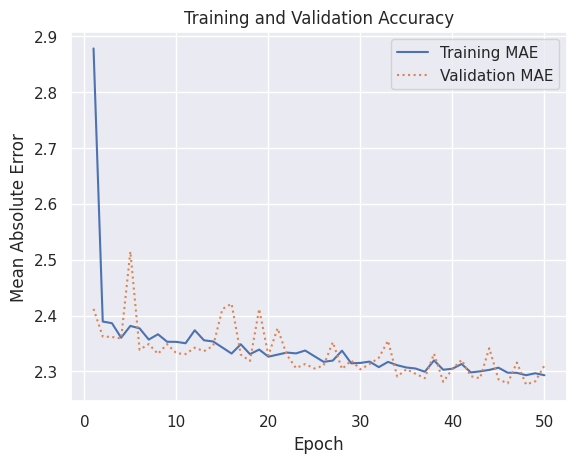

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Last, but not least, let's make some predictions:

In [4]:
from sklearn.metrics import r2_score

r2_score(y, model.predict(x)) 

NameError: ignored

Estimate what it will cost to hire a taxi for a 2-mile trip at 5:00pm on a Friday afternoon:
- day of the week `[ Monday:0, Tuesday:1, Wednesday:2, Thursday:3, Friday:4, Saturday:5, Sunday:6]`
- time, military time
- distance in miles

In [8]:
import numpy as np

# day of the week, time, and distance
model.predict(np.array([[4, 17, 2.0]]))

1/1 [==============================] - 0s 61ms/step


array([[11.193481]], dtype=float32)

# ✨ New Material

To talk about:
- practicing building models 
- sensitive data
- imbalanced datasets
- saving and loading models

# Fraud Detection with Neural Networks

Credit card companies use ML models to examine transactions in real time and identify ones that are likely to be fraudulent. 
- the features they use contain sensitive information (credit card numbers, purchase history, etc)

## 💬 Group Discussion:
- the anonymity of the customers should be preserved somehow, while keeping as much data as possible. Any ideas how we might go about doing this?

> Go ahead and download the `creditcard.csv` file from Bb.

- `Time` is the number of seconds elapsed since the first transaction
- `Class` tells us whether the transaction is legitimate (0) or fraudulent (1)
- `Amount` is the amount the transaction was for. 
- The other columns `V1` - `V28` were generated using PCA from information that isn't revelaed to us. 


In [7]:
import pandas as pd

path = '/content/drive/MyDrive/CS167/Datasets/creditcard.csv'
df = pd.read_csv(path)
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# Imbalanced Datasets:

In the real world, we rarely get the privilege of working with nicely balanced datasets. This dataset is a great example of this. 

What do I mean by a __balanced dataset__? 
- relatively equal distribution of the classes we're trying to predict.

How might we check to see if our dataset is balanced?

In [16]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

We'll use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)'s `stratify` parameter to ensure that the ratio of legimate and fraudulent transactions is consisten in the training and the testing dataset:

In [17]:
from sklearn.model_selection import train_test_split

x = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

# Exercise #1: Build our network

What kind of machine learning are we doing here? Classifiation or regression?

Let's build a network that has:
- `input_dim=29`
- 1 hidden layer with 128 neurons
- `relu` for the activation function of the hidden layer
- a `Dense` output layer with a `sigmoid` activation function. 

when you're done, print out the summary of your model. 

In [18]:
# your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential() 

#build your model here:
model.add(Dense(128, activation="relu", input_dim=29))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3840      
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [19]:
# compile your model with loss='binary_crossentropy', optimizer='adam', and metrics=['accuracy']
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [20]:
# train your model for 10 epochs, with batch_size=100
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
2279/2279 [==============================] - 14s 4ms/step - loss: 0.0253 - accuracy: 0.9989 - val_loss: 0.0265 - val_accuracy: 0.9991
Epoch 2/10
2279/2279 [==============================] - 9s 4ms/step - loss: 0.0117 - accuracy: 0.9992 - val_loss: 0.0071 - val_accuracy: 0.9992
Epoch 3/10
2279/2279 [==============================] - 10s 4ms/step - loss: 0.0101 - accuracy: 0.9993 - val_loss: 0.0113 - val_accuracy: 0.9992
Epoch 4/10
2279/2279 [==============================] - 8s 4ms/step - loss: 0.0076 - accuracy: 0.9994 - val_loss: 0.0048 - val_accuracy: 0.9994
Epoch 5/10
2279/2279 [==============================] - 10s 4ms/step - loss: 0.0092 - accuracy: 0.9993 - val_loss: 0.0062 - val_accuracy: 0.9994
Epoch 6/10
2279/2279 [==============================] - 9s 4ms/step - loss: 0.0077 - accuracy: 0.9993 - val_loss: 0.0082 - val_accuracy: 0.9994
Epoch 7/10
2279/2279 [==============================] - 8s 4ms/step - loss: 0.0051 - accuracy: 0.9994 - val_loss: 0.0042 - val_accura

Plot the training accuracy and validation acuracy:

[]

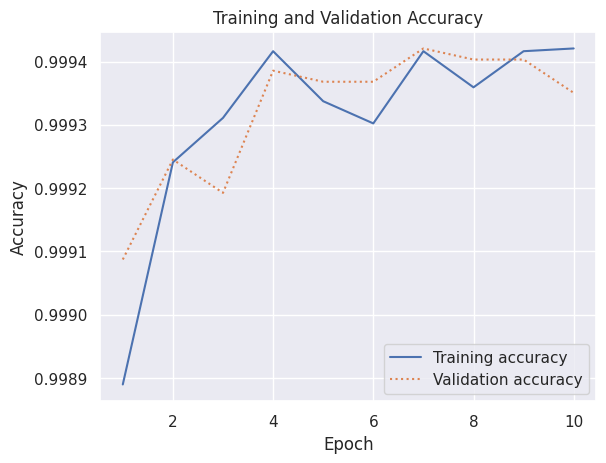

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Visualize the results as a confusion matrix:

1781/1781 [==============================] - 3s 2ms/step


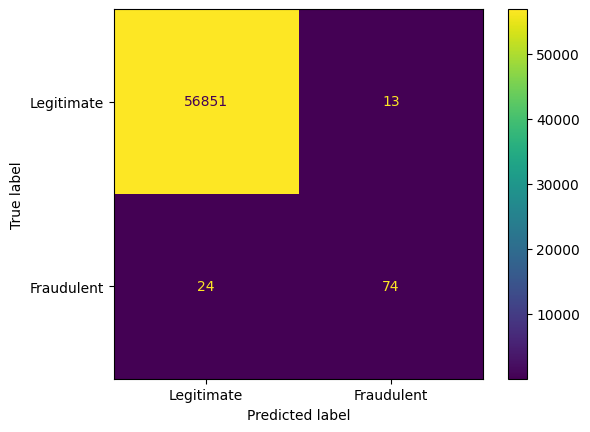

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

sns.reset_orig()
y_predicted = model.predict(x_test) > 0.5 # it will be 1 if > 0.5 and 0 otherwise
labels = ['Legitimate', 'Fraudulent']

cm = confusion_matrix(y_test, y_predicted, labels=df.Class.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

Your results will vary, but in this example, the model caught 74 of 98 fraudulent cases, and missclassified 9 legitimate charges as fraudulent. 

What is the accuracy of fraudulent cases?

In [22]:
total_fraudulent = 24 + 74
correct = 74
correct / total_fraudulent

0.7551020408163265

## Things to consider:

- how might we make predictions with this model?

# Multiclass Classification with Neural Networks:

We just did an example where we were doing `binary classification`. What things do we need to change to be able to do `multiclass classification`?

- the output layer needs to contain _one neuron per output class_
- the output layer should use _______ activation instead of `sigmoid`.
- the loss function wil be `sparse_cateogrical_crossentropy`

## Training a Neural Network to Recognize Faces

We're going to use the [Labeled Faces in the Wild (LFW)](http://vis-www.cs.umass.edu/lfw/) dataset.

We'll learn that Convolutional Neural Networks will be able to do a better job on this data than regular Neural networks. But let's give it a shot:

# Load the dataset:

This dataset contains more than 13,000 facial images collected from tne internet. 

Of the more than 5000 people represented in the dataset 1680 have two or more facial images, while only five have 100 or more. 

We'll set the minimum number of faces per person to 100, which means that five sets of faces corresponding to five famous people will be imported. 

In [50]:
import pandas as pd
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=100, slice_=None)
faces.images = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(faces.images.shape[0], faces.images.shape[1] * faces.images.shape[2])
image_count = faces.images.shape[0]
image_height = faces.images.shape[1]
image_width = faces.images.shape[2]
class_count = len(faces.target_names)

print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


In total, 1140 facial images were loaded. AFter cropping, each image measures 47x 62 pixels for a total of 2914 pixels per image. That means we're workign with a dataset containing 2914 feature columns.

Use the folloiwng code to show the first 24 images in the dataset and the poeple to whom the faces belong.

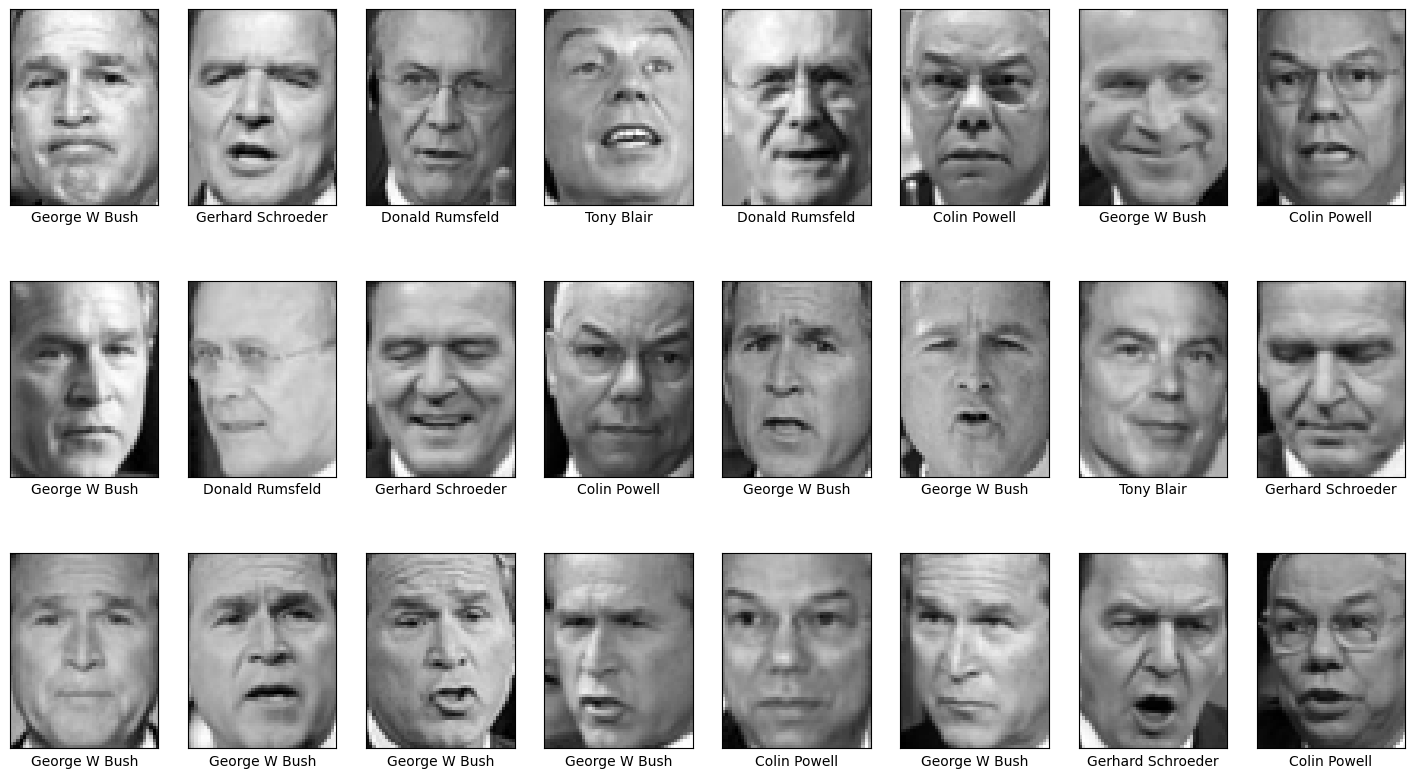

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 8, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

## 💬 Group Exercise 

Check the balance of the dataset:

The dataset is not very well balanced, and that's a concern because classification models are best trained with balanced datasets. Use the following code to build a dataset containing 100 images of each person.

In [52]:
import numpy as np

mask = np.zeros(faces.target.shape, dtype=bool)

for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:100]] = 1
    
x_faces = faces.data[mask]
y_faces = faces.target[mask]
x_faces.shape

(500, 2914)

## Split the data for training and testing:

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_faces, y_faces, train_size=0.8, stratify=y_faces, random_state=0)

## Build and train a neural network:

Start by using Keras to build and train an eural network containnig:
- one hidden layer with 512 neurons. 
- `sparse_categorical_crossentropy` as the loss function
- a `softmax` activation function on our output layer since this is a multiclass classification task 
-  `adam` as our optimization algorithm

In [55]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
 
model = Sequential()
# build your model here:
model.add(Dense(512, activation='relu', input_shape=(image_width * image_height,)))
model.add(Dense(class_count, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               1492480   
                                                                 
 dense_9 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 1,495,045
Trainable params: 1,495,045
Non-trainable params: 0
_________________________________________________________________


Now, train your model:

In [56]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=20)

Epoch 1/100
20/20 [==============================] - 2s 16ms/step - loss: 2.9072 - accuracy: 0.2175 - val_loss: 1.8046 - val_accuracy: 0.2000
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 1.8073 - accuracy: 0.2150 - val_loss: 1.8075 - val_accuracy: 0.2700
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 1.5164 - accuracy: 0.3475 - val_loss: 1.5420 - val_accuracy: 0.2900
Epoch 4/100
 1/20 [>.............................] - ETA: 0s - loss: 1.4588 - accuracy: 0.3500

KeyboardInterrupt: ignored

Plot the training and validation accuracy:

[]

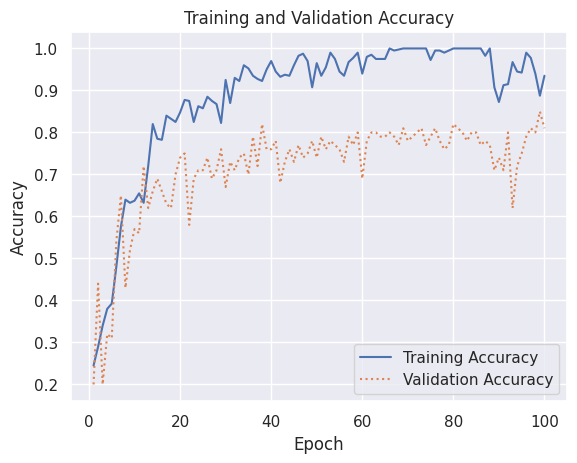

In [46]:
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

And... finally, use the test data to generate a confusion matrix to visualize how the network performs.

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import sklearn
print(sklearn.__version__)

sns.reset_orig()
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=faces.target_names)
disp.plot()

1.2.2
4/4 [==============================] - 0s 4ms/step


ValueError: ignored

# Keras Callbacks:

Want to check in on your network while it's training? Keras's [_callbacks API_](https://keras.io/api/callbacks/) allows us to do so

Let's demo the callbacks API using MNIST, a very common computer vision dataset of handwritten digit recognition.

In [48]:
from tensorflow.keras.datasets import mnist

(train_images, y_train), (test_images, y_test) = mnist.load_data()
print('train_images: ' + str(train_images.shape))
print('y_train: ' + str(y_train.shape))
print('test_images: ' + str(test_images.shape))
print('y_test: ' + str(y_test.shape))

11490434/11490434 [==============================] - 0s 0us/step
train_images: (60000, 28, 28)
y_train: (60000,)
test_images: (10000, 28, 28)
y_test: (10000,)


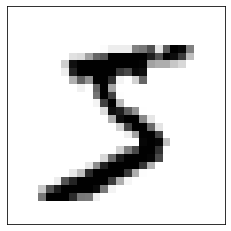

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(train_images[0], cmap=plt.cm.gray_r)


Plot the first 50 images from MNIST:

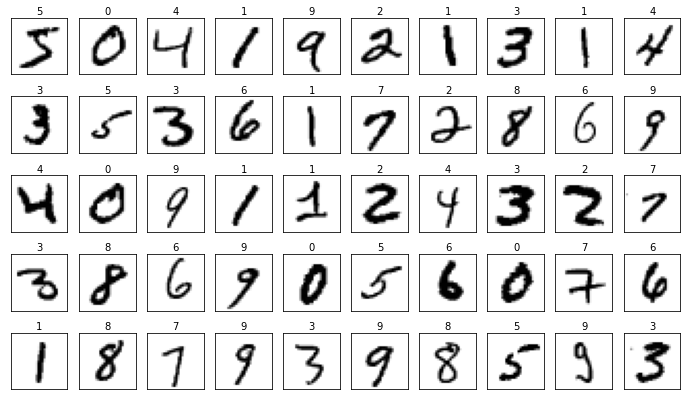

In [ ]:
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(y_train[i]), transform=ax.transAxes)

## Check to make sure it's balanced:

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

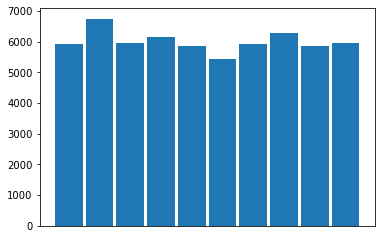

In [ ]:
plt.xticks([])
plt.hist(y_train, rwidth=0.9)

Prepare the input data by flattening the pixel arrays and normalizing the pixel valuse by dividing thben by 255.

In [ ]:
x_train = train_images.reshape(60000, 28 * 28) / 255
x_test = test_images.reshape(10000, 28 * 28) / 255

Create a neural network with a `softmax` output layer for the classification:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=28 * 28))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Call `fit` to train the model. Stop training if the validation accuracy fails to imporve for 5 consecutive epochs, and reduce the learning rate if the validation accuracy fails to imporve for 3 consecutive epochs.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3)

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=50,
                 callbacks=[early_stop, reduce_lr])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2842 - accuracy: 0.9205 - val_loss: 0.1500 - val_accuracy: 0.9549
Epoch 2/100
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1272 - accuracy: 0.9630 - val_loss: 0.1085 - val_accuracy: 0.9672
Epoch 3/100
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0889 - accuracy: 0.9734 - val_loss: 0.0826 - val_accuracy: 0.9763
Epoch 4/100
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0665 - accuracy: 0.9800 - val_loss: 0.0770 - val_accuracy: 0.9767
Epoch 5/100
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0517 - accuracy: 0.9843 - val_loss: 0.0780 - val_accuracy: 0.9755
Epoch 6/100
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0408 - accuracy: 0.9876 - val_loss: 0.0757 - val_accuracy: 0.9773
Epoch 7/100
60000/60000 [=========================

[]

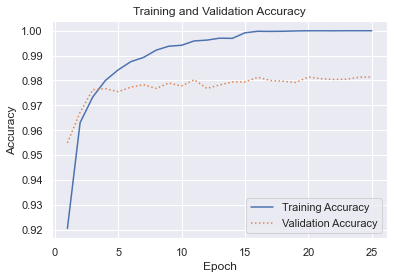

In [ ]:
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()